# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [13]:
# Load pickled data
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
import scipy.ndimage as nd
import cv2
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [14]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

11
Images with Sign-name: Speed limit (20km/h)


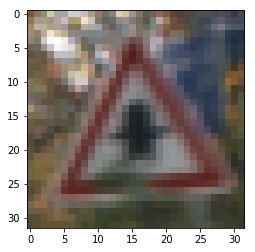

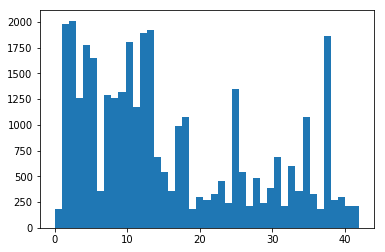

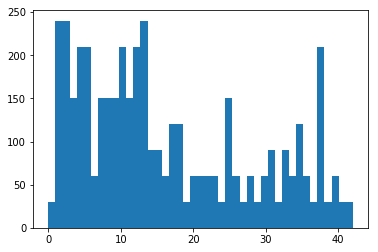

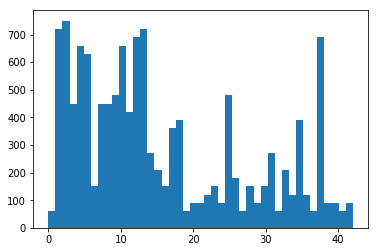

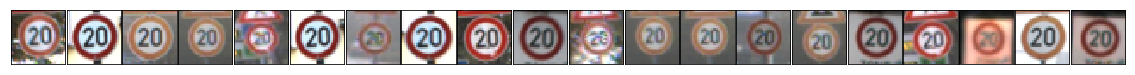

Images with Sign-name: Speed limit (30km/h)


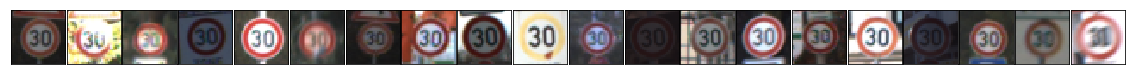

Images with Sign-name: Speed limit (50km/h)


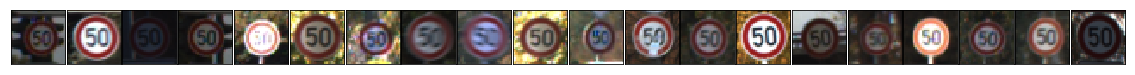

Images with Sign-name: Speed limit (60km/h)


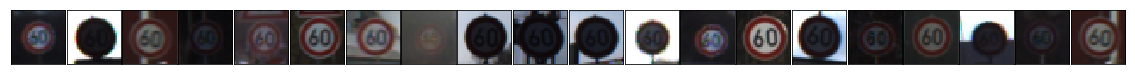

Images with Sign-name: Speed limit (70km/h)


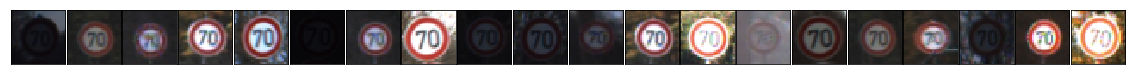

Images with Sign-name: Speed limit (80km/h)


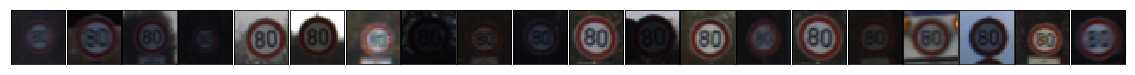

Images with Sign-name: End of speed limit (80km/h)


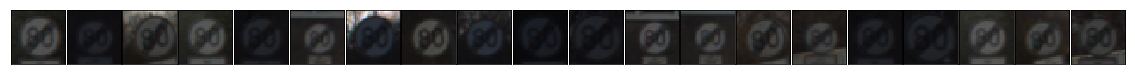

Images with Sign-name: Speed limit (100km/h)


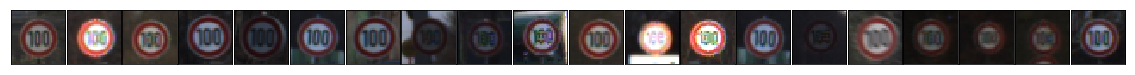

Images with Sign-name: Speed limit (120km/h)


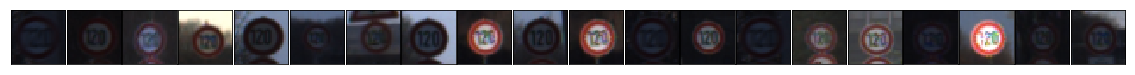

Images with Sign-name: No passing


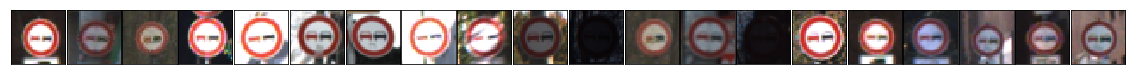

Images with Sign-name: No passing for vehicles over 3.5 metric tons


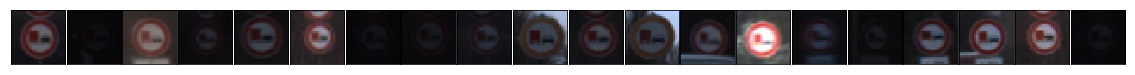

Images with Sign-name: Right-of-way at the next intersection


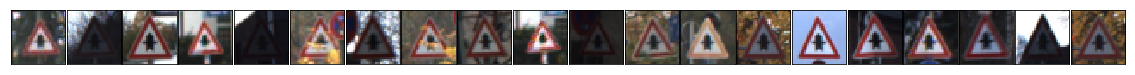

Images with Sign-name: Priority road


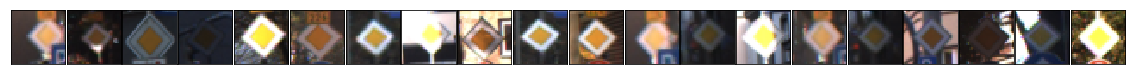

Images with Sign-name: Yield


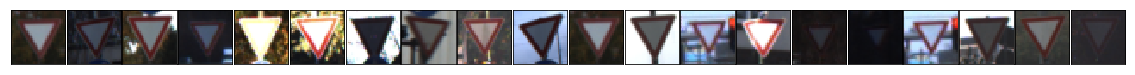

Images with Sign-name: Stop


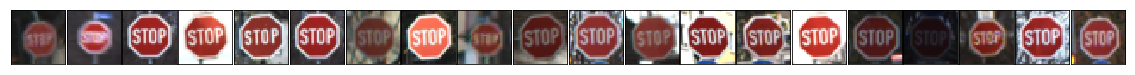

Images with Sign-name: No vehicles


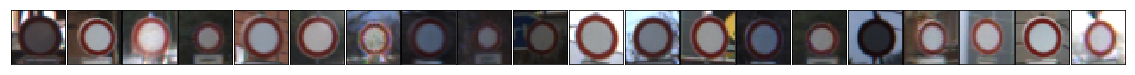

Images with Sign-name: Vehicles over 3.5 metric tons prohibited


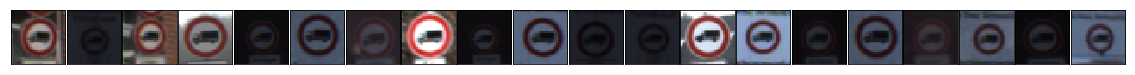

Images with Sign-name: No entry


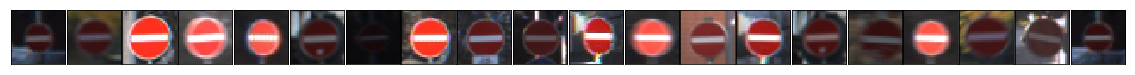

Images with Sign-name: General caution


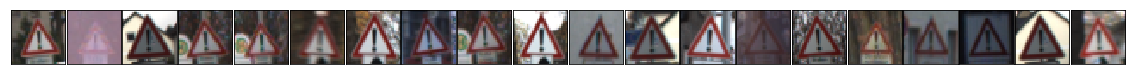

Images with Sign-name: Dangerous curve to the left


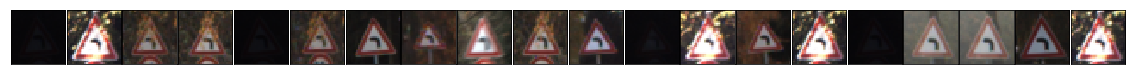

Images with Sign-name: Dangerous curve to the right


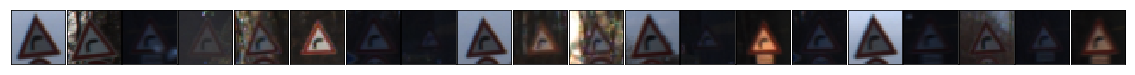

Images with Sign-name: Double curve


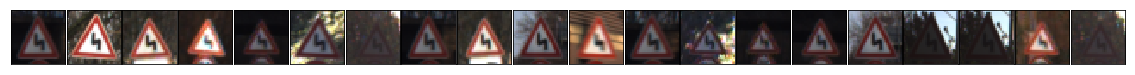

Images with Sign-name: Bumpy road


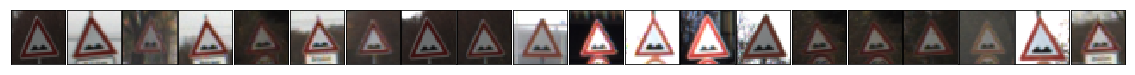

Images with Sign-name: Slippery road


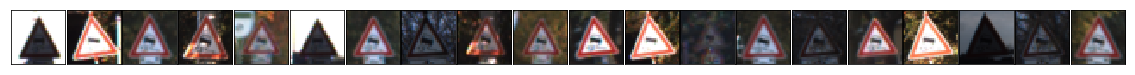

Images with Sign-name: Road narrows on the right


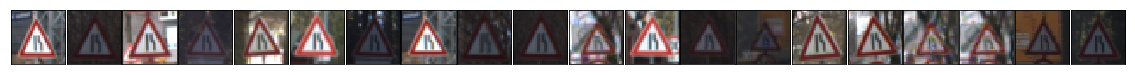

Images with Sign-name: Road work


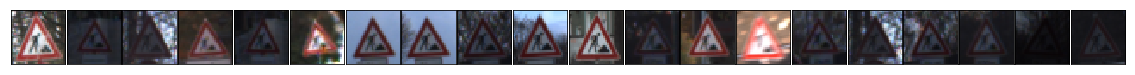

Images with Sign-name: Traffic signals


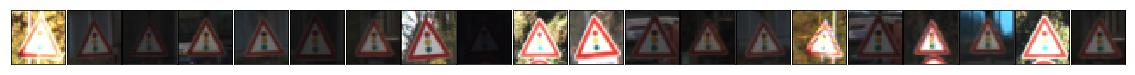

Images with Sign-name: Pedestrians


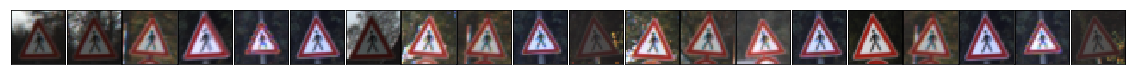

Images with Sign-name: Children crossing


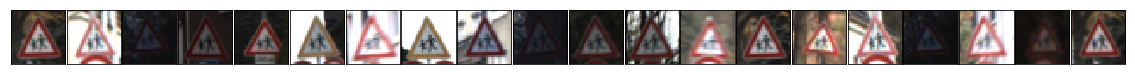

Images with Sign-name: Bicycles crossing


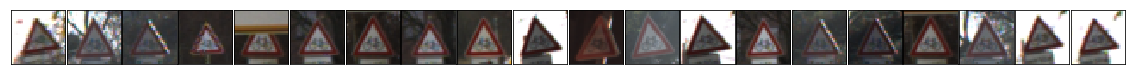

Images with Sign-name: Beware of ice/snow


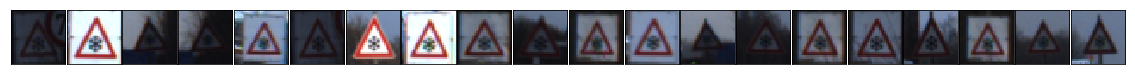

Images with Sign-name: Wild animals crossing


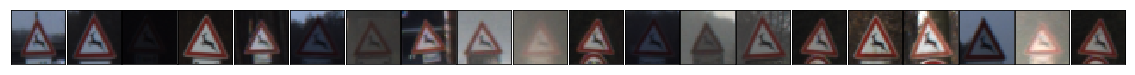

Images with Sign-name: End of all speed and passing limits


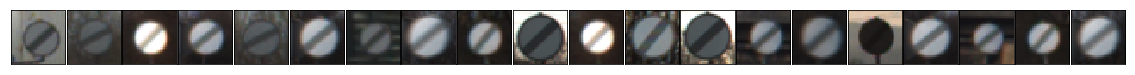

Images with Sign-name: Turn right ahead


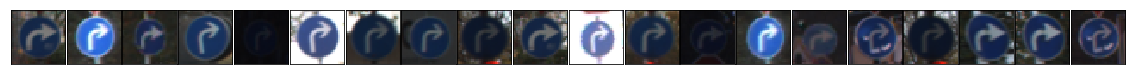

Images with Sign-name: Turn left ahead


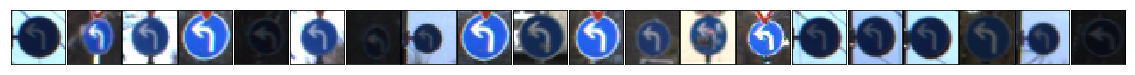

Images with Sign-name: Ahead only


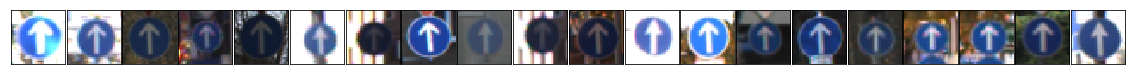

Images with Sign-name: Go straight or right


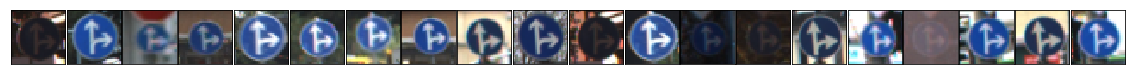

Images with Sign-name: Go straight or left


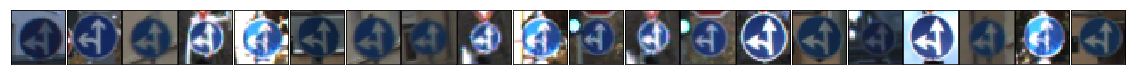

Images with Sign-name: Keep right


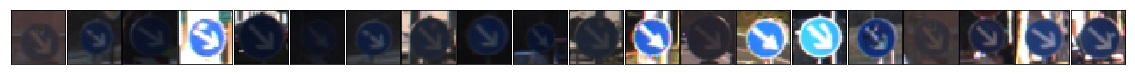

Images with Sign-name: Keep left


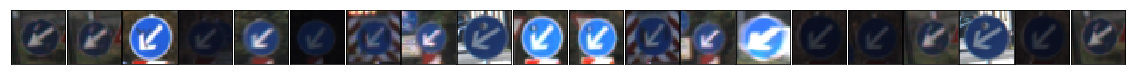

Images with Sign-name: Roundabout mandatory


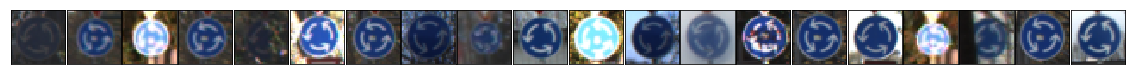

Images with Sign-name: End of no passing


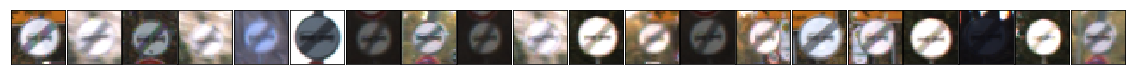

Images with Sign-name: End of no passing by vehicles over 3.5 metric tons


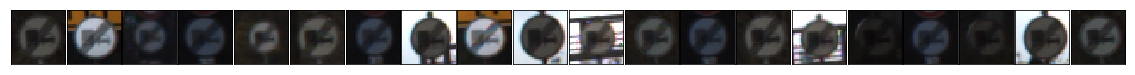

In [24]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.


# Visualize a random image
index = random.randint(0, len(X_train))
image = X_train[index]

plt.imshow(image)
plt.figure()
print(y_train[index])

#Visualize histogram
n,bins,patches = plt.hist(y_train, bins=n_classes)
plt.figure()

classes_poor_rep = list(np.where((n-np.mean(n))<0)[0])
classes_good_rep = list(np.where((n-np.mean(n))>=0)[0])

n,bins,patches = plt.hist(y_valid, bins=n_classes)
plt.figure()
n,bins,patches = plt.hist(y_test, bins=n_classes)
plt.figure();

#Read Traffic Sign Class Descriptions from CSV
sn_df = pd.read_csv('signnames.csv')
df_sh = sn_df.shape
class_n_list = [sn_df.iat[i,1] for i in range(0,df_sh[0])]

#Display 20 images of data from Training set for every class label
for i in range(0,len(class_n_list)):
    print("Images with Sign-name:",class_n_list[i])
    s_label_indices = list(np.where(y_train==i)[0])
    rand_samps = random.sample(s_label_indices, 20)
    fig = plt.figure(figsize=(20, 1))  
    fig.subplots_adjust(hspace=0, wspace=0)
    for j in range(20):
        image = X_train[rand_samps[j]]
        axis = fig.add_subplot(1, 20, j+1, xticks=[], yticks=[])
        axis.imshow(image)
    plt.show()

In [25]:
#this cell keeps track of which classes have a poor representation in the training data-set.
#Collect and Aggregate their data and keep aside for selective data augmentation for images belonging to classes with poor rep.
X_train_poor_rep = []
y_train_poor_rep = []
for i in range(0,len(classes_poor_rep)):
    #Find all y_train indices belonging to this class
    s_label_indices = list(np.where(y_train==classes_poor_rep[i])[0])
    #Aggregate all X-Train data together for this class
    for j in range(0,len(s_label_indices)):
        X_train_poor_rep.append(X_train[s_label_indices[j]])
        y_train_poor_rep.append(classes_poor_rep[i])

#Seperate out data with good rep
X_train_good_rep = []
y_train_good_rep = []
for i in range(0,len(classes_good_rep)):
    #Find all y_train indices belonging to this class
    s_label_indices = list(np.where(y_train==classes_good_rep[i])[0])
    #Aggregate all X-Train data together for this class
    for j in range(0,len(s_label_indices)):
        X_train_good_rep.append(X_train[s_label_indices[j]])
        y_train_good_rep.append(classes_good_rep[i])

X_train_poor_rep = np.array(X_train_poor_rep)
X_train_good_rep = np.array(X_train_good_rep)
y_train_poor_rep = np.array(y_train_poor_rep)
y_train_good_rep = np.array(y_train_good_rep)

print(X_train_poor_rep.shape)
print(X_train_good_rep.shape)
print(y_train_poor_rep.shape)
print(y_train_good_rep.shape)

X_train_poor_rep,y_train_poor_rep = shuffle(X_train_poor_rep,y_train_poor_rep)
X_train_good_rep,y_train_good_rep = shuffle(X_train_good_rep,y_train_good_rep)
    

(9119, 32, 32, 3)
(25680, 32, 32, 3)
(9119,)
(25680,)


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [15]:
#Grayscale
def grayconv(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img.reshape(32,32,1)
    return(img)

#Batch processor
def conv2Gray(images):
    g_img = []
    for image in images:
        temp = grayconv(image)
        g_img.append(temp)
    return np.array(g_img)

def ContrastNormalize(ip, sample_size):
    #Global contrast normalization to zero mean and unit variance
    X_tf= tf.convert_to_tensor(ip)
    X_normalized = np.zeros(shape=(ip.shape))
    for i in range(0,sample_size):
        X_normalized[i,:,:,:] = tf.Session().run(tf.image.per_image_standardization(ip[i,:,:,:]))
    return np.squeeze(X_normalized)

def RotateAug(ip, sample_size, y_train):
    X_rot  = np.zeros(shape=(ip.shape)).astype(np.uint8)
    for i in range(0,sample_size):
        X_rot[i,:,:,:] = nd.rotate(ip[i,:,:,:], random.randint(-10,10), reshape=False, mode='nearest')
    return X_rot,y_train

def TranslateAug(ip, sample_size, y_train):
    #No rotation matrix
    no_rot = np.array([[1 ,0],[0,1]])
    X_trans = np.zeros(shape=(ip.shape)).astype(np.uint8)
    for i in range(0,sample_size):
        off = (float)(random.randint(-2,2))
        for j in range(0,X_trans.ndim-1):
            X_trans[i,:,:,j] = nd.interpolation.affine_transform(ip[i,:,:,j],no_rot,offset=off,mode='nearest',prefilter=False)
    return X_trans, y_train

def ScaleAug(ip, sample_size, y_train):
    X_scale = np.zeros(shape=(ip.shape)).astype(np.uint8)
    for i in range(0,sample_size):
        #Scaling without rotation
        scale_no_rot = np.array([[random.uniform(0.9,1.1) ,0],[0,random.uniform(0.9,1.1)]])
        for j in range(0,X_scale.ndim-1):
            X_scale[i,:,:,j] = nd.interpolation.affine_transform(ip[i,:,:,j],scale_no_rot,mode='nearest',prefilter=False)
    return X_scale, y_train

#Reference: https://groups.google.com/forum/#!topic/lasagne-users/meCDNeA9Ud4
def ColourPerturbAug(ip, sample_size, y_ip):
    data = np.zeros(shape=(ip.shape[1]*ip.shape[2]*ip.shape[0],ip.shape[3])).astype(np.uint8)
    X_colpert = np.zeros(shape=(ip.shape)).astype(np.float32)
    dp = 0
    for i in range(0,len(ip)):
        im_re = ip[i,:,:,:].reshape(32*32,3)
        data[dp:dp+1024,:] = im_re
        dp = dp + 1024
    cov = np.cov(data.T)
    eigvals, eigvects = np.linalg.eigh(cov)
    pca = np.sqrt(eigvals) * eigvects
    perturb = (pca * np.random.randn(3) * 0.1).sum(axis=1)
    for i in range(0, len(ip)):
        X_colpert[i,:,:,:] += perturb.astype(np.float32)
    return X_colpert,y_ip

Rotation set generated
Translation set generated
Scaled set generated


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


(139196, 3072)
Train is normalized
Validation is normalized
Test is normalized
(139196, 32, 32, 3)
Shuffling done
(139196, 32, 32, 3)


' Approach 7- Grayscale + Per image standardization(Whitening) -- takes too much time- Not DONE\n#Reshaping before contrast normalization\nX_train_gray = np.reshape(X_train_gray,(X_train_gray.shape[0],X_train_gray.shape[1],X_train_gray.shape[2],1))\nX_valid_gray = np.reshape(X_valid_gray,(X_valid_gray.shape[0],X_valid_gray.shape[1],X_valid_gray.shape[2],1))\nX_test_gray = np.reshape(X_test_gray,(X_test_gray.shape[0],X_test_gray.shape[1],X_test_gray.shape[2],1))\n\nX_train = ContrastNormalize(X_train_gray,n_train_mod)\nprint("Training data contrast normalized")\n\nX_valid = ContrastNormalize(X_valid_gray,n_validation)\n\nprint("Validation data contrast normalized")\n\n\nX_test = ContrastNormalize(X_test_gray,n_test)\nprint("Test data contrast normalized")\n\ny_train = y_train_ext\n\n#Shuffle the augmented training data\nX_train, y_train = shuffle(X_train, y_train)\nprint("Shuffling done")\n'

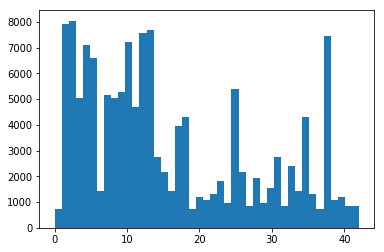

In [16]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#By default Data Augmentation is enabled.
data_aug_flag = True
#Selective data augmentation of poor-Rep classes only
data_aug_poor_rep = False
#Enable or disable colour augmentation
data_colour_pca_aug = False
#By Default Grayscale conversion is not done
gray_conv = False

### Data Augmentation

if( ( data_aug_flag == True ) and (data_aug_poor_rep == False) ):
    #Category 1: Rotated
    X_train_rot,y_train_rot = RotateAug(X_train,n_train,y_train)
    X_train_rot,y_train_rot = shuffle(X_train_rot, y_train_rot)
    print("Rotation set generated")
    
    #Category 2: Translated
    X_train_trans,y_train_trans = TranslateAug(X_train,n_train,y_train)
    X_train_trans,y_train_trans = shuffle(X_train_trans,y_train_trans)
    print("Translation set generated")

    #Category 3: Scaled
    X_train_scaled, y_train_scaled = ScaleAug(X_train,n_train,y_train)
    X_train_scaled,y_train_scaled = shuffle(X_train_scaled,y_train_scaled)
    print("Scaled set generated")
    
    if data_colour_pca_aug == True:
        #Category 4: ColourPerturbed
        X_col, y_col = ColourPerturbAug(X_train,n_train,y_train)
        X_col, y_col = shuffle(X_col, y_col)
        print("Colour perturbed set generated")
    
    #Append with rotated set
    X_train_ext = np.append(X_train,X_train_rot, axis=0)
    y_train_ext = np.append(y_train, y_train_rot)
    
    #Append with Translated set
    X_train_ext = np.append(X_train_ext,X_train_trans, axis=0)
    y_train_ext = np.append(y_train_ext, y_train_trans)
    
    #Append with Scaled set
    X_train_ext = np.append(X_train_ext,X_train_scaled, axis=0)
    y_train_ext = np.append(y_train_ext, y_train_scaled)
    
    if data_colour_pca_aug == True:
        #Append with Colour perturbed set
        X_train_ext = np.append(X_train_ext,X_col, axis=0)
        y_train_ext = np.append(y_train_ext, y_col)
elif( data_aug_poor_rep == True):
    #Category 1: Rotated
    X_train_poor_rot,y_train_poor_rot = RotateAug(X_train_poor_rep,len(X_train_poor_rep),y_train_poor_rep)
    X_train_poor_rot,y_train_poor_rot = shuffle(X_train_poor_rot,y_train_poor_rot)
    print("Rotation set generated")
    
    #Category 2: Translated
    X_train_poor_trans,y_train_poor_trans = TranslateAug(X_train_poor_rep,len(X_train_poor_rep),y_train_poor_rep)
    X_train_poor_trans,y_train_poor_trans = shuffle(X_train_poor_trans,y_train_poor_trans)
    print("Translation set generated")

    #Category 3: Scaled
    X_train_poor_scaled, y_train_poor_scaled = ScaleAug(X_train_poor_rep,len(X_train_poor_rep),y_train_poor_rep)
    X_train_poor_scaled, y_train_poor_scaled = shuffle(X_train_poor_scaled, y_train_poor_scaled)
    print("Scaled set generated")
    
    if data_colour_pca_aug == True:
        #Category 4: ColourPerturbed
        X_col_poor, y_col_poor = ColourPerturbAug(X_train_poor_rep,len(X_train_poor_rep),y_train_poor_rep)
        X_col_poor, y_col_poor = shuffle(X_col_poor, y_col_poor)
        print("Colour perturbed set generated")
    
    X_train_ext = np.append(X_train_good_rep,X_train_poor_rot, axis=0)
    y_train_ext = np.append(y_train_good_rep, y_train_poor_rot)
    
    #Append with Translated set
    X_train_ext = np.append(X_train_ext,X_train_poor_trans, axis=0)
    y_train_ext = np.append(y_train_ext, y_train_poor_trans)
    
    #Append with Scaled set
    X_train_ext = np.append(X_train_ext,X_train_poor_scaled, axis=0)
    y_train_ext = np.append(y_train_ext, y_train_poor_scaled)
    
    if data_colour_pca_aug == True:
        #Append with Colour perturbed set
        X_train_ext = np.append(X_train_ext,X_col_poor, axis=0)
        y_train_ext = np.append(y_train_ext, y_col_poor)
    
else:
    #disable any Data Augmentation
    X_train_ext,y_train_ext = X_train,y_train

"""
#Approach 1: Grayscale + Normalization- never exceeded 0.87
#Grayscale conversion
X_train_gray = conv2Gray(X_train_ext)
X_valid_gray = conv2Gray(X_valid)
X_test_gray = conv2Gray(X_test)

print("All Gray converted")

#trial run
X_train_interm = np.reshape(X_train_gray,(X_train_gray.shape[0],X_train_gray.shape[1]*X_train_gray.shape[2]))
X_valid_interm = np.reshape(X_valid_gray,(X_valid_gray.shape[0],X_valid_gray.shape[1]*X_valid_gray.shape[2]))
X_test_interm = np.reshape(X_test_gray,(X_test_gray.shape[0],X_test_gray.shape[1]*X_test_gray.shape[2]))


scaler = StandardScaler()
X_train_interm = scaler.fit_transform(X_train_interm)
print("Train is normalized")

X_valid_interm = scaler.fit_transform(X_valid_interm)
print("Validation is normalized")

X_test_interm = scaler.fit_transform(X_test_interm)
print("Test is normalized")


print("trial run done")

X_train = np.reshape(X_train_interm,(X_train_gray.shape[0],X_train_gray.shape[1],X_train_gray.shape[2],1)).astype(np.float32)
X_valid = np.reshape(X_valid_interm,(X_valid_gray.shape[0],X_valid_gray.shape[1],X_valid_gray.shape[2],1)).astype(np.float32)
X_test = np.reshape(X_test_interm,(X_test_gray.shape[0],X_test_gray.shape[1],X_test_gray.shape[2],1)).astype(np.float32)

y_train = y_train_ext

#Shuffle the augmented training data
X_train, y_train = shuffle(X_train, y_train)
print("Shuffling done")


print(type(X_train[0,0,0]))
"""

"""
#Approach 2: Colour channels + Normalization---> Better than approach 1, max reached -.91 validation(AO)
#trial run
X_train_interm = np.reshape(X_train_ext,(X_train_ext.shape[0],X_train_ext.shape[1]*X_train_ext.shape[2]*X_train_ext.shape[3]))
X_valid_interm = np.reshape(X_valid,(X_valid.shape[0],X_valid.shape[1]*X_valid.shape[2]*X_valid.shape[3]))
X_test_interm = np.reshape(X_test,(X_test.shape[0],X_test.shape[1]*X_test.shape[2]*X_test.shape[3]))

scaler = StandardScaler()
X_train_interm = scaler.fit_transform(X_train_interm)
print(X_train_interm.shape)
print("Train is normalized")

X_valid_interm = scaler.fit_transform(X_valid_interm)
print("Validation is normalized")

X_test_interm = scaler.fit_transform(X_test_interm)
print("Test is normalized")


print("trial run done")
X_train = np.reshape(X_train_interm,(X_train_ext.shape[0],X_train_ext.shape[1],X_train_ext.shape[2],3)).astype(np.float32)
X_valid = np.reshape(X_valid_interm,(X_valid.shape[0],X_valid.shape[1],X_valid.shape[2],3)).astype(np.float32)
X_test = np.reshape(X_test_interm,(X_test.shape[0],X_test.shape[1],X_test.shape[2],3)).astype(np.float32)

y_train = y_train_ext
print(X_train.shape)

#Shuffle the augmented training data
X_train, y_train = shuffle(X_train, y_train)
print("Shuffling done")


print(type(X_train[0,0,0,0]))
"""

"""
#Approach 3: Just colour channels and scaling by midpoint of range- 0.933 accuracy(AO)
X_train = (X_train_ext-128.0)/128.0
y_train = y_train_ext

X_valid = (X_valid-128.0)/128.0
X_test = (X_test-128.0)/128.0
X_train, y_train = shuffle(X_train, y_train)
print("Shuffling done")
"""

#Approach 4: Colour channels + Min-Max Scaling Normalization- 0.934 accuracy(AO)
#trial run
"""
X_train_interm = np.reshape(X_train_ext,(X_train_ext.shape[0],X_train_ext.shape[1]*X_train_ext.shape[2]*X_train_ext.shape[3]))
X_valid_interm = np.reshape(X_valid,(X_valid.shape[0],X_valid.shape[1]*X_valid.shape[2]*X_valid.shape[3]))
X_test_interm = np.reshape(X_test,(X_test.shape[0],X_test.shape[1]*X_test.shape[2]*X_test.shape[3]))

scaler = MinMaxScaler()
X_train_interm = scaler.fit_transform(X_train_interm)
print(X_train_interm.shape)
print("Train is normalized")

X_valid_interm = scaler.fit_transform(X_valid_interm)
print("Validation is normalized")

X_test_interm = scaler.fit_transform(X_test_interm)
print("Test is normalized")


print("trial run done")
X_train = np.reshape(X_train_interm,(X_train_ext.shape[0],X_train_ext.shape[1],X_train_ext.shape[2],3)).astype(np.float32)
X_valid = np.reshape(X_valid_interm,(X_valid.shape[0],X_valid.shape[1],X_valid.shape[2],3)).astype(np.float32)
X_test = np.reshape(X_test_interm,(X_test.shape[0],X_test.shape[1],X_test.shape[2],3)).astype(np.float32)

y_train = y_train_ext
print(X_train.shape)
"""

"""
#Approach 5:Grayscale + Min-Max Scaling
#Grayscale conversion
X_train_gray = conv2Gray(X_train_ext)
X_valid_gray = conv2Gray(X_valid)
X_test_gray = conv2Gray(X_test)

print("All Gray converted")

#trial run
X_train_interm = np.reshape(X_train_gray,(X_train_gray.shape[0],X_train_gray.shape[1]*X_train_gray.shape[2]))
X_valid_interm = np.reshape(X_valid_gray,(X_valid_gray.shape[0],X_valid_gray.shape[1]*X_valid_gray.shape[2]))
X_test_interm = np.reshape(X_test_gray,(X_test_gray.shape[0],X_test_gray.shape[1]*X_test_gray.shape[2]))


scaler = MinMaxScaler()
X_train_interm = scaler.fit_transform(X_train_interm)
print("Train is normalized")

X_valid_interm = scaler.fit_transform(X_valid_interm)
print("Validation is normalized")

X_test_interm = scaler.fit_transform(X_test_interm)
print("Test is normalized")


print("trial run done")

X_train = np.reshape(X_train_interm,(X_train_gray.shape[0],X_train_gray.shape[1],X_train_gray.shape[2],1)).astype(np.float32)
X_valid = np.reshape(X_valid_interm,(X_valid_gray.shape[0],X_valid_gray.shape[1],X_valid_gray.shape[2],1)).astype(np.float32)
X_test = np.reshape(X_test_interm,(X_test_gray.shape[0],X_test_gray.shape[1],X_test_gray.shape[2],1)).astype(np.float32)

y_train = y_train_ext

#Shuffle the augmented training data
X_train, y_train = shuffle(X_train, y_train)
print("Shuffling done")


print(type(X_train[0,0,0,0]))
"""

#temp
scaler_std = False
scaler_minmax = True
#Approach 6: Grayscale + Scaling to -1,1
if gray_conv == True:
    X_train_gray = np.sum(X_train_ext/3, axis=3, keepdims=True)
    X_valid_gray = np.sum(X_valid/3, axis=3, keepdims=True)
    X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)
    print("All Gray converted")
else:
    X_train_gray = X_train_ext
    X_valid_gray = X_valid
    X_test_gray = X_test

if gray_conv == True:
    X_train = (X_train_gray-128)/128
    y_train = y_train_ext
    X_valid = (X_valid_gray-128)/128
    X_test = (X_test_gray-128)/128
elif( scaler_std == True or scaler_minmax == True ):
    if scaler_std == True:
        scaler = StandardScaler()
    elif scaler_minmax == True:
        scaler = MinMaxScaler()
    X_train_interm = np.reshape(X_train_ext,(X_train_ext.shape[0],X_train_ext.shape[1]*X_train_ext.shape[2]*X_train_ext.shape[3]))
    X_valid_interm = np.reshape(X_valid,(X_valid.shape[0],X_valid.shape[1]*X_valid.shape[2]*X_valid.shape[3]))
    X_test_interm = np.reshape(X_test,(X_test.shape[0],X_test.shape[1]*X_test.shape[2]*X_test.shape[3]))
        
    X_train_interm = scaler.fit_transform(X_train_interm)
    print(X_train_interm.shape)
    print("Train is normalized")
    X_valid_interm = scaler.fit_transform(X_valid_interm)
    print("Validation is normalized")
    X_test_interm = scaler.fit_transform(X_test_interm)
    print("Test is normalized")
        
    X_train = np.reshape(X_train_interm,(X_train_ext.shape[0],X_train_ext.shape[1],X_train_ext.shape[2],3)).astype(np.float32)
    X_valid = np.reshape(X_valid_interm,(X_valid.shape[0],X_valid.shape[1],X_valid.shape[2],3)).astype(np.float32)
    X_test = np.reshape(X_test_interm,(X_test.shape[0],X_test.shape[1],X_test.shape[2],3)).astype(np.float32)
    y_train = y_train_ext
    print(X_train.shape)
else:
    X_train = (X_train_gray-128)/128
    y_train = y_train_ext
    X_valid = (X_valid_gray-128)/128
    X_test = (X_test_gray-128)/128
        
X_train, y_train = shuffle(X_train, y_train)
print("Shuffling done")

print(X_train.shape)

#Visualize histogram
n,bins,patches = plt.hist(y_train, bins=n_classes)
plt.figure()

""" Approach 7- Grayscale + Per image standardization(Whitening) -- takes too much time- Not DONE
#Reshaping before contrast normalization
X_train_gray = np.reshape(X_train_gray,(X_train_gray.shape[0],X_train_gray.shape[1],X_train_gray.shape[2],1))
X_valid_gray = np.reshape(X_valid_gray,(X_valid_gray.shape[0],X_valid_gray.shape[1],X_valid_gray.shape[2],1))
X_test_gray = np.reshape(X_test_gray,(X_test_gray.shape[0],X_test_gray.shape[1],X_test_gray.shape[2],1))

X_train = ContrastNormalize(X_train_gray,n_train_mod)
print("Training data contrast normalized")

X_valid = ContrastNormalize(X_valid_gray,n_validation)

print("Validation data contrast normalized")


X_test = ContrastNormalize(X_test_gray,n_test)
print("Test data contrast normalized")

y_train = y_train_ext

#Shuffle the augmented training data
X_train, y_train = shuffle(X_train, y_train)
print("Shuffling done")
"""

In [54]:
#Save X_train, X_test, y_train, X_valid to a dictionary-pickling
mydict = {'x_train':X_train, 'x_test':X_test, 'x_v':X_valid, 'y_t':y_train}
op = open('myfile.pkl','wb')
pickle.dump(mydict,op)
op.close()

MemoryError: 

### Model Architecture

In [3]:
#Load X_train, X_test, y_train, X_valid to a dictionary-pickling
pkl_file = open('myfile.pkl', 'rb')
mydict2 = pickle.load(pkl_file)
pkl_file.close()

X_train = mydict2['x_train']
X_test = mydict2['x_test']
X_valid = mydict2['x_v']
y_train = mydict2['y_t']

In [66]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.--> 24*24*6
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6. 24*24*6 to 12*12*6
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits



In [18]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

#Flag to enable or Disable LRN
enable_lrn_flag = True
#Disable or enable Inception layer
enable_incep_layer = False

def LeNet_MultiScale(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    #Enable or disable LRN
    if enable_lrn_flag == True:
        conv1 = tf.nn.lrn(conv1, depth_radius=6)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    #Subsample first layers output and keep it as backup to be fed into the fully connected layers.
    if enable_incep_layer == False:
        #Output= 7x7x6. Flattened output = 294 if inception layer is diabled otherw flattened output is 1176
        layer_backup = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
        layer_backup = flatten(layer_backup)
    else:
        layer_backup = flatten(conv1)
    
    if enable_incep_layer == False:
        # Layer 2: Convolutional. Output = 10x10x16.
        conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
        conv2_b = tf.Variable(tf.zeros(16))
        conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
        # Activation.
        conv2 = tf.nn.relu(conv2)
        #Enable or disable LRN
        if enable_lrn_flag == True:
            conv2 = tf.nn.lrn(conv2, depth_radius=7)
        # Pooling. Input = 10x10x16. Output = 5x5x16.
        conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    else:
        conv2_1_1_W1 = tf.Variable(tf.truncated_normal(shape=(1, 1, 6, 4), mean = mu, stddev = sigma))
        conv2_1_1_b1 = tf.Variable(tf.zeros(4))
        #1st inception output shape = 14x14x4
        conv2_incep1   = tf.nn.conv2d(conv1, conv2_1_1_W1, strides=[1, 1, 1, 1], padding='SAME') + conv2_1_1_b1
        
        
        conv2_1_1_W2 = tf.Variable(tf.truncated_normal(shape=(1, 1, 6, 3), mean = mu, stddev = sigma))
        conv2_1_1_b2 = tf.Variable(tf.zeros(3))
        #2nd inception itnermediate output shape = 14x14x3
        conv2_incep2_1 = tf.nn.conv2d(conv1, conv2_1_1_W2, strides=[1, 1, 1, 1], padding='SAME') + conv2_1_1_b2
        conv2_incep2_1 = tf.nn.relu(conv2_incep2_1)
        
        conv2_3_3_W2 = tf.Variable(tf.truncated_normal(shape=(3, 3, 3, 4), mean = mu, stddev = sigma))
        conv2_3_3_b2 = tf.Variable(tf.zeros(4))
        #2nd inception output shape = 14x14x4
        conv2_incep2 = tf.nn.conv2d(conv2_incep2_1, conv2_3_3_W2, strides=[1, 1, 1, 1], padding='SAME') + conv2_3_3_b2
        
        conv2_1_1_W3 = tf.Variable(tf.truncated_normal(shape=(1, 1, 6, 3), mean = mu, stddev = sigma))
        conv2_1_1_b3 = tf.Variable(tf.zeros(3))
        #3rd inception intermediate output shape = 14x14x3
        conv2_incep3_1 = tf.nn.conv2d(conv1, conv2_1_1_W3, strides=[1, 1, 1, 1], padding='SAME') + conv2_1_1_b3
        conv2_incep3_1 = tf.nn.relu(conv2_incep3_1)
             
        conv2_5_5_W3 = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 4), mean = mu, stddev = sigma))
        conv2_5_5_b3 = tf.Variable(tf.zeros(4))
        #3rd incpetion output shape = 14x14x4
        conv2_incep3 = tf.nn.conv2d(conv2_incep3_1, conv2_5_5_W3, strides=[1, 1, 1, 1], padding='SAME') + conv2_5_5_b3
        
        conv2_mpool = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='SAME')
        conv2_1_1_W4 = tf.Variable(tf.truncated_normal(shape=(1, 1, 6, 4), mean = mu, stddev = sigma))
        conv2_1_1_b4 = tf.Variable(tf.zeros(4))
        #4th inception output shape = 14x14x4
        conv2_incep4 = tf.nn.conv2d(conv2_mpool, conv2_1_1_W4, strides=[1, 1, 1, 1], padding='SAME') + conv2_1_1_b4
        
        #Concatenate all 4 incept layer and relu them to generate 14x14x16 output shape
        inception1 = tf.nn.relu(tf.concat_v2([conv2_incep1,conv2_incep2,conv2_incep3,conv2_incep4],2))
        
        if enable_lrn_flag == True:
            inception1 = tf.nn.lrn(inception1, depth_radius=7)
                   

    # Flatten. Input = 5x5x16. Output = 400.
    if enable_incep_layer == False:
        fc0   = flatten(conv2)
    else:
        #Input is 14x14x16 and output is 3136
        fc0 = flatten(inception1)
    
    #Concatenate layer1's backup and layer2's flattened output to feed into the Fullyconnected classifier NW.
    #Total-Size = 400 + 294 = 694 if inception layer is disabled. Otherwise size is 3136+1176 = 4312
    fc0 = tf.concat_v2([fc0, layer_backup], 1)
    
    if enable_incep_layer == False:
        # Layer 3: Fully Connected. Input = 694. Output = 120.
        fc1_W = tf.Variable(tf.truncated_normal(shape=(694, 120), mean = mu, stddev = sigma))
    else:
        # Layer 3: Fully Connected. Input = 4312. Output = 120.
        fc1_W = tf.Variable(tf.truncated_normal(shape=(4312, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits



### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [19]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32,3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

rate = 0.001
EPOCHS = 60
BATCH_SIZE = 128

logits = LeNet_MultiScale(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.907

EPOCH 2 ...
Validation Accuracy = 0.935

EPOCH 3 ...
Validation Accuracy = 0.939

EPOCH 4 ...
Validation Accuracy = 0.939

EPOCH 5 ...
Validation Accuracy = 0.940

EPOCH 6 ...
Validation Accuracy = 0.939

EPOCH 7 ...
Validation Accuracy = 0.944

EPOCH 8 ...
Validation Accuracy = 0.942

EPOCH 9 ...
Validation Accuracy = 0.951

EPOCH 10 ...
Validation Accuracy = 0.945

EPOCH 11 ...
Validation Accuracy = 0.955

EPOCH 12 ...
Validation Accuracy = 0.952

EPOCH 13 ...
Validation Accuracy = 0.948

EPOCH 14 ...
Validation Accuracy = 0.945

EPOCH 15 ...
Validation Accuracy = 0.948

EPOCH 16 ...
Validation Accuracy = 0.948

EPOCH 17 ...
Validation Accuracy = 0.937

EPOCH 18 ...
Validation Accuracy = 0.947

EPOCH 19 ...
Validation Accuracy = 0.932

EPOCH 20 ...
Validation Accuracy = 0.950

EPOCH 21 ...
Validation Accuracy = 0.952

EPOCH 22 ...
Validation Accuracy = 0.948

EPOCH 23 ...
Validation Accuracy = 0.948

EPOCH 24 ...
Validation Accura

In [20]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.955


In [ ]:
Log of things tried out:
1) Compared Adam and Gradient Optimizier for diff learning rates 0.001, 0.01 and 0.1 with Colour Images + Data Augmentation
and Adam Optimizer always outperformed Gradient Opitmizer for PReprocessing approach 4 but accuracies werenot exceeding
0.91.

2) Adam Optimizer with 60 Epochs and Learn rate of 0.001 with Grayscale + Scaling to (-1,1). Gives around 93.5% Validation accuracy and 92.1% Test-Acc
Multiple approaches to convert to Grayscale.
https://www.johndcook.com/blog/2009/08/24/algorithms-convert-color-grayscale/. Utilizing Average method over Luminosity givrs better results.

3) MultiScaleLenent was implemented with 60 Epochs and all other params same as for case 2), which gives 95% Validation accuracy and 92.8%
test accuracy

4) Added Data Augmentation of only rotation and same arch as 3), marginal incrase in Validation accurary of 95.1% but Test-Accuracy
improves to 93.7%

5) Added Data Augmentation of Translation + Scaling with no change from 4) and marginal increase in Validation accuracy of 95.2% and Test-Accuracy
decreases to 93.4% --> Overfitting starting to take effect.

6) Removing grayscale and trying with colour channels with same arch and with Min-Max Scaling. Validation accuracy drops to 94.9%
but test accuracy rises to 93.9%

7) Trying same arch as 6) but with Standard Scaling instead of Min-Max Scaling and its gives worse off results. Scrapping and reverting
back to 6.

8) Trying out LRN from Alex-Net paper on top of Arch @ 6 and it gives Validation accuracy of close to 96.2% and Test-Accuracy of
close to 96% --> checkpoint one worthy of submission. LRN Depth-radius used are 6 and 7 respectively.

9) tried out colour augmentation of training image set only from alexnet proposed approach--> validation and test-accuracy falls adown a bit

10) Tried out data-augmentation of samples belonging to classes with poor-representation only without colour augmentation
and gives validation accuracy of 95.7% and Test-Accuracy of 94.6%

Restoring flag defaults to config of 8).
11) Tried out Inception layer instead of conv2 layer2 with LRN but still accuracy isnot better. Giving up and restoring to approach
taken in 8).


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

(5, 32, 32, 3)


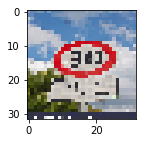

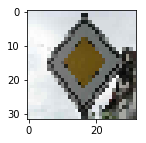

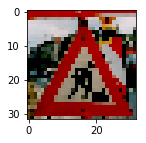

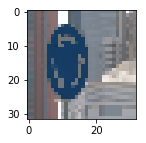

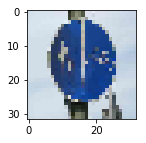

In [21]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
im1 = './images/30kph.jpg'
im2 = './images/Arterial.jpg'
im3 = './images/Menatwork.jpg'
im4 = './images/Roundabout.jpg'
im5 = './images/Share-Path.jpg'
im_paths = [im1, im2, im3, im4, im5]
images_l = []

for im in im_paths:
    img = cv2.imread(im)
    res = cv2.resize(img, dsize=(32, 32), interpolation=cv2.INTER_NEAREST)
    res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
    images_l.append(res)
    plt.figure(figsize=(2,2))
    plt.imshow(res)

images_l = np.array(images_l)
print(images_l.shape)

### Predict the Sign Type for Each Image

In [27]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
scaler = MinMaxScaler()
im_set_interm = np.reshape(images_l,(images_l.shape[0],images_l.shape[1]*images_l.shape[2]*images_l.shape[3]))
im_set_interm = scaler.fit_transform(im_set_interm)
print(im_set_interm.shape)
print("Image is normalized")
images_l = np.reshape(im_set_interm,(images_l.shape[0],images_l.shape[1],images_l.shape[2],3)).astype(np.float32)
print(images_l.shape)

#Predict the signs
sn_df = pd.read_csv('signnames.csv')
df_sh = sn_df.shape
class_im_list = [sn_df.iat[i,1] for i in range(0,df_sh[0])]
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    result = sess.run(logits, feed_dict={x: images_l})
    result = np.array(result)
    print(result.shape)
    pred_im_classes = np.argmax(result, axis=1)
    print("Image1 ground truth is 30 kmph and prediction is:",class_im_list[pred_im_classes[0]])
    print("Image2 ground truth is Priority Road and prediction is:",class_im_list[pred_im_classes[1]])
    print("Image3 ground truth is Road work and prediction is:",class_im_list[pred_im_classes[2]])
    print("Image4 ground truth is Round-about and prediction is:",class_im_list[pred_im_classes[3]])
    print("Image5 ground truth is Share-Path and prediction is:",class_im_list[pred_im_classes[4]])

(5, 3072)
Image is normalized
(5, 32, 32, 3)
(5, 43)
Image1 ground truth is 30 kmph and prediction is: Stop
Image2 ground truth is Priority Road and prediction is: Priority road
Image3 ground truth is Road work and prediction is: Road work
Image4 ground truth is Round-about and prediction is: Go straight or right
Image5 ground truth is Share-Path and prediction is: Turn left ahead


### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")